En los talleres previos hemos explorado el uso de Pandas para el manejo y visualización de datos. Ahora vamos a aprender a usar [Geopandas](https://geopandas.org/en/stable/) para manipular y visualizar datos geográficos. En general, Geopandas funciona de forma muy similar a Pandas, de hecho, todo lo que se puede hacer con Pandas se puede hacer con Geopandas, pero además nos provee una serie de métodos específicos pára trabajar con información geoespacial. 

La _clase_ básica de Geopandas es el [GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe), que es una extensión del concepto de DataFrame que incluye una columna especial con la _geometría_ de los objetos geográficos.

Para ir empezando a trabajar con este tipo de datos, vamos a utilizar datos del Censo de Población y Vivienda 2020 del INEGI.

Primero, importamos las librerías que vamos a utilizar

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
from seaborn import palplot
import requests

## Leyendo datos geográficos

A través del método [`read_file()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html), Geopandas nos permite leer archivos en una variedad de formatos. Vamos a comenzar por leer el _shapefile_ de las AGEBS para la Ciudad de México.

In [2]:
agebs = gpd.read_file("datos/agebs_cdmx.zip")  # Importar los datos espaciales
agebs

CVEGEO CVE_ENT CVE_MUN CVE_LOC CVE_AGEB  \
0     0901000011716      09     010    0001     1716   
1     0901000012150      09     010    0001     2150   
2     0901000011133      09     010    0001     1133   
3     0901000011307      09     010    0001     1307   
4     0901000010281      09     010    0001     0281   
...             ...     ...     ...     ...      ...   
2426  0900700012564      09     007    0001     2564   
2427  0900700012615      09     007    0001     2615   
2428  0900700012969      09     007    0001     2969   
2429  0900700013721      09     007    0001     3721   
2430  0900700011034      09     007    0001     1034   

                                               geometry  
0     POLYGON ((2787237.541 816989.461, 2787288.728 ...  
1     POLYGON ((2794154.458 823013.444, 2794155.774 ...  
2     POLYGON ((2795690.723 820050.788, 2795684.238 ...  
3     POLYGON ((2792584.475 815678.668, 2792624.325 ...  
4     POLYGON ((2788845.392 823526.074, 2788840.549 ...  
...                                                 ...  
2426  POLYGON ((2814016.268 821043.511, 2814019.319 ...  
2427  POLYGON ((2814358.791 820744.850, 2814405.087 ...  
2428  POLYGON ((2815993.470 819777.763, 2816019.848 ...  
2429  POLYGON ((2807966.150 821578.350, 2807941.550 ...  
2430  POLYGON ((2808319.196 821552.683, 2808243.251 ...  

[2431 rows x 6 columns]

Como pueden ver, el resultado es similar a un DataFrame, pero con la columna especial `geometry`

In [3]:
agebs.geometry.head()

0    POLYGON ((2787237.541 816989.461, 2787288.728 ...
1    POLYGON ((2794154.458 823013.444, 2794155.774 ...
2    POLYGON ((2795690.723 820050.788, 2795684.238 ...
3    POLYGON ((2792584.475 815678.668, 2792624.325 ...
4    POLYGON ((2788845.392 823526.074, 2788840.549 ...
Name: geometry, dtype: geometry

Esta columna guarda las geometrías de nuestros datos. Una primera cosa que siempre queremos hacer cuando leemos una _capa_ es visualizarla rápidamente, de la misma forma en la que lo hacemos en QGis o Arc. Para esto, los GeoDataFrames tienen el método [`plot`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) que nos permite una exploración rápida.

<AxesSubplot: >

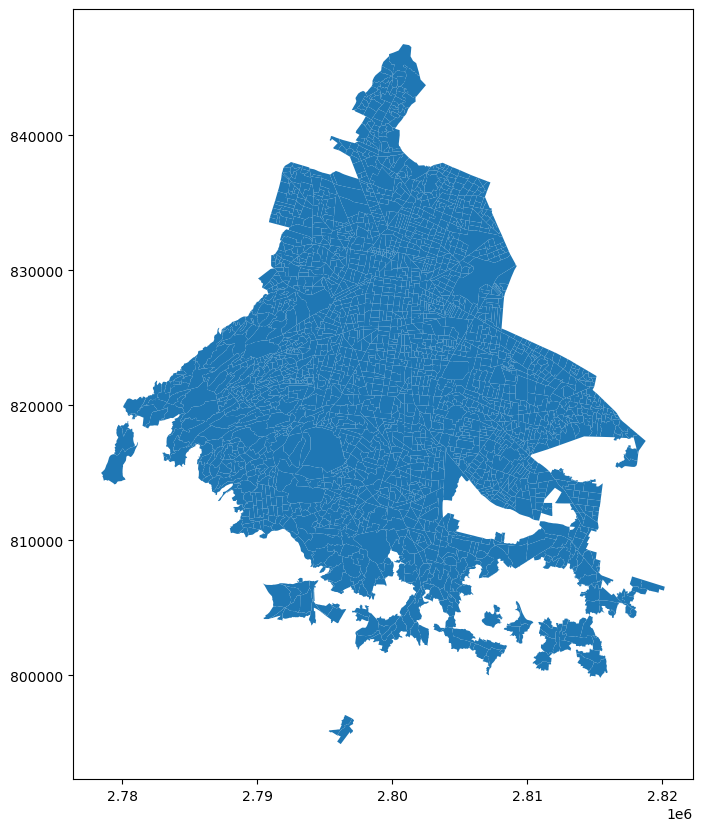

In [4]:
agebs.plot(figsize = (10,10))

Esta es sólo una primera visualización rápida que nos permite asegurarnos explorar los datos, más addelante vamos a ver diferentes formas de mejorar estos mapas.

#### Líneas

De la misma forma en que leimos un archivo con polígonos, podemos leer un archivo que contiene líneas, en este caso las calles de la delegación Cuahutemoc. Noten además que este archivo es un _geojson_ y GeoPandas es capaz de inferir el tipo de archiovo a través de la extensión.

In [6]:
vias = gpd.read_file("datos/vias_cuauhtemoc.geojson") # Se importan los datos espaciales
vias = vias.set_index('id')                         # Se establece una columna como índice
vias.head()                                         # Visualizar los primeros registros de la fila

geometry
id                                                   
1   LINESTRING (-99.17041 19.40092, -99.17047 19.4...
2   LINESTRING (-99.17850 19.40720, -99.17868 19.4...
3   LINESTRING (-99.14905 19.43796, -99.14871 19.4...
4   LINESTRING (-99.14735 19.44531, -99.14718 19.4...
5   LINESTRING (-99.17655 19.42105, -99.17645 19.4...

Al igual que con los polígonos, es posible utilizar la función `.plot()` para graficar las líneas rápidamente:

<AxesSubplot: >

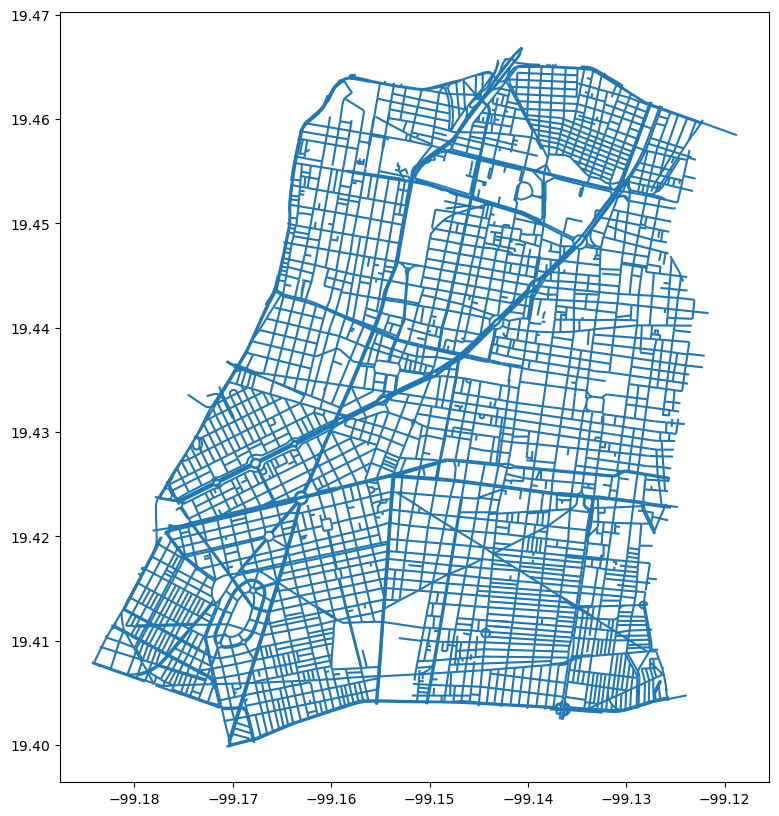

In [7]:
vias.plot(figsize = (10,10))

Una vez más, estas no son las mejores visualizaciones pero nos ayudan a explorar rápidamente la capa.



#### Puntos
Las capas de puntos se comportan de la misma forma. Por ejemplo, leamos un shape con las estaciones de metro:

In [9]:
estaciones = gpd.read_file("datos/estaciones_metro.zip")
estaciones.head()

stop_lat   stop_lon                          geopoint agency_id   stop_id  \
0  19.443082 -99.139034          (2:19.443082,-99.139034)     METRO   14169.0   
1  19.468965 -99.136176  (2:19.468965,-99.13617600000001)     METRO   14103.0   
2  19.376256 -99.187746      (2:19.37625563,-99.18774605)     METRO   14079.0   
3  19.408944 -99.122279      (2:19.40894369,-99.12227869)     METRO   14144.0   
4  19.375679 -99.186866      (2:19.37567873,-99.18686628)     METRO  132131.0   

                                     stop_desc    stop_name  \
0   Metro Línea 8 correspondencia con línea B.  Garibaldi_1   
1   Metro Línea 5 correspondencia con línea 3.  La Raza_1_3   
2  Metro Línea 7 correspondencia con línea 12.    Mixcoac_1   
3   Metro Línea 9 correspondencia con línea 4.      Jamaica   
4  Metro Línea 12 correspondencia con línea 7.      Mixcoac   

                         trip_heads                        geometry  
0  Garibaldi - Constitución de 1917  POINT (485405.843 2149860.572)  
1           Pantitlán - Politécnico  POINT (485708.110 2152724.378)  
2                 Tláhuac - Mixcoac  POINT (480284.558 2142470.874)  
3              Tacubaya - Pantitlán  POINT (487161.939 2146081.726)  
4                 Mixcoac - Tláhuac  POINT (480376.875 2142406.938)

Y la visualización se produce de forma idéntica a los casos anteriores:

<AxesSubplot: >

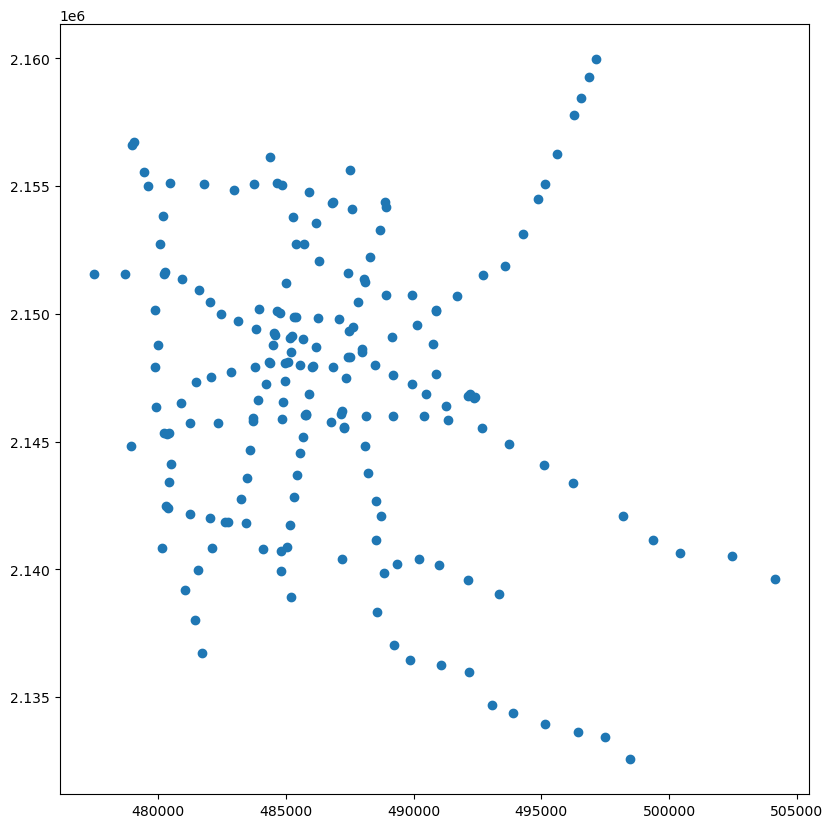

In [10]:
estaciones.plot(figsize = (10,10))

___
## Produciendo mejores mapas

Los mapas que hicimos hasta aquí sirven como forma de explorar los datos rápidamente, sin embargo, es posible producir mucho mejores visualizaciones de forma relativamente sencilla cambiando los parámetros que usamos para graficar. 

### Transpariencia

La intensidad del color de un polígono puede ser cambiado a través del parámetro `alpha` del método `plot()`. Este parámetro es un valor entre cero y uno, donde el 0 representa transparencia completa y el 1 completa opacidad (máxima intensidad):

<AxesSubplot: >

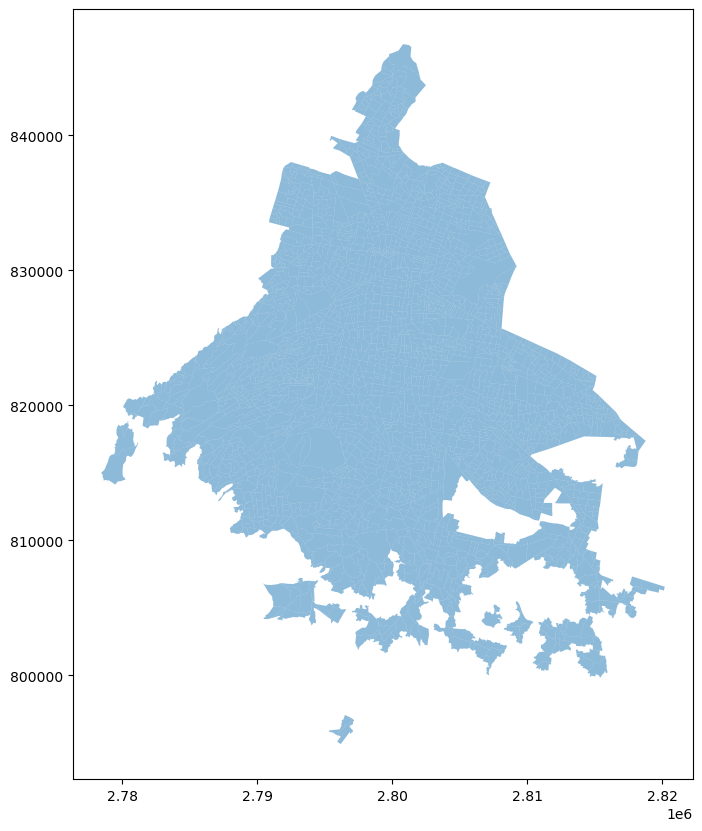

In [11]:
agebs.plot(alpha = 0.5 , figsize = (10,10))

#### Eliminar Ejes

Los mapas que hemos visto son, por debajo, gráficas de `matplotlib`, `matplotlib` está hecha para producir gráficas generales sobre una infinidad de temáticas. En general, entender una gráfica necesita información sobre la escala de variación de los datos, esta información suele proveerse a través de _ejes_. Por otro lado, en los mapas, a veces los ejes resultan redundantes y es mejor omitirlos.

Elimiar los ejes (y otras operaciones) involucra _hablar_ con la _figura_ que contiene nuestro mapa. Las gráficas de `matplotlib` están organizadas en una estructura jerárquica que, en su forma más sencilla contiene un objeto de tipo [`figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html), adentro del cual hay uno o más objetos de tipo [`axes`](https://matplotlib.org/stable/api/axes_api.html). Son estos últimos los que se encargan propiamente de _dibujar_ la gráfica.

Para poder manipular las propiedades de nuestros mapas (o gráficas en general), necesitamos tener acceso a los objetos `figure` y `axes`. La forma más simple es _instanciándolos_ diréctamente a la hora de crear nuestra gráfica.

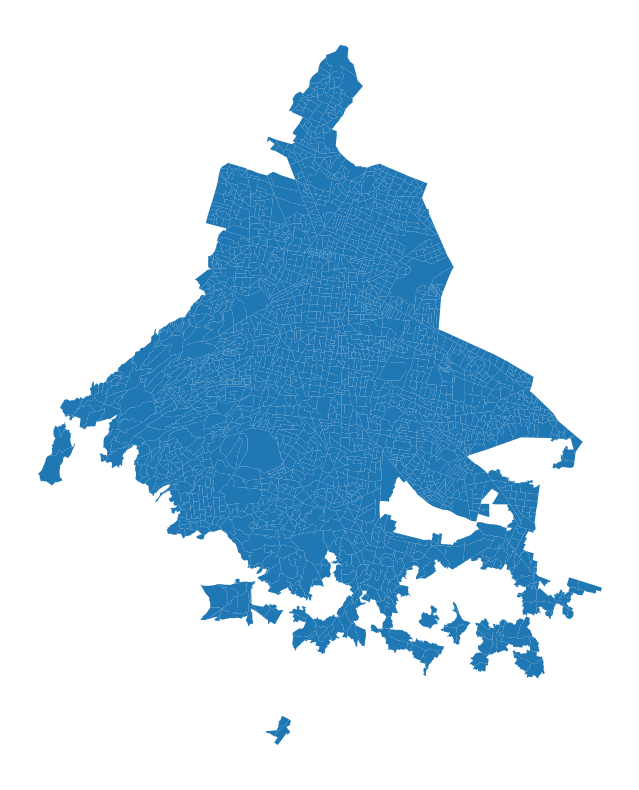

In [13]:
fig , ax = plt.subplots(1, figsize=(10,10))  # Preparación de la Figura y sus Ejes, así como el tamaño
agebs.plot(ax = ax)                          # Grafica la capa de polígonos sobre la fila
ax.set_axis_off()                            # Eliminar las ventanas de los ejes
plt.show()                                     # Mostrar el resultado

Analicemos a detalle cada una de las líneas anteriores:
1. Creamos una figura con el nombre `fig` que contiene un sólo eje llamado `ax`. Para eso usamos la función [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). Este método genera dos elementos que pueden ser asignados a dos variables diferentes (`fig` y `ax`), lo cual se logra colocando sus nombres al inicio de la línea, separándolos por comas.
2. Graficamos las geometrías de la misma forma que en los ejemplos anteriores, esta vez indicándole a la función que dibuje los polígonos en el eje que generamos anteriormente, a través del argumento `ax`.
3. Finalmente, eliminamos los ejes llamando al método `set_axis_off()` del eje.

### Añadir un Título

Así como los ejes son parte del objeto `axes`, el título de la gráfica es propiedad del objeto `figure`. Para cambiarlo simplemente llamamos al método `suptitle` de la figura.

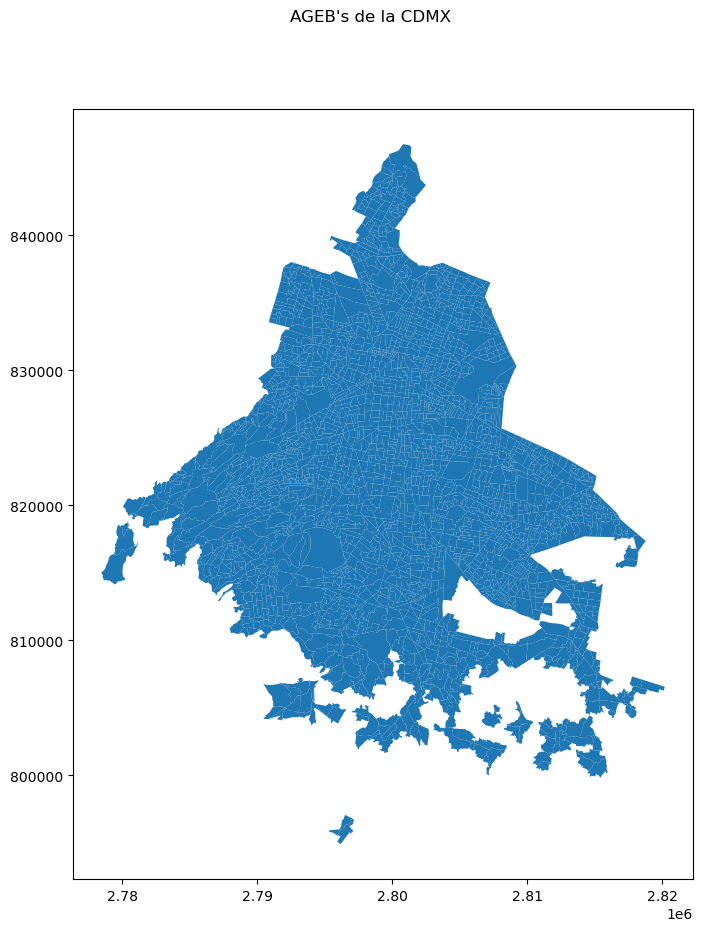

In [14]:
fig , ax = plt.subplots(1, figsize=(10,10))
agebs.plot(ax = ax)
fig.suptitle("AGEB's de la CDMX") # A través de la función '.suptitle()' aplicada a la figura se coloca el título.
plt.show()

#### Cambiar el Tamaño del Mapa

En los primeros ejemplos fijamos el tamaño de la gráfica a través del argumento `figsize` del m´todo `plot()` de nuestros GeoDataFrames. También podemos cambiarlo en el momento de crear las figuras.

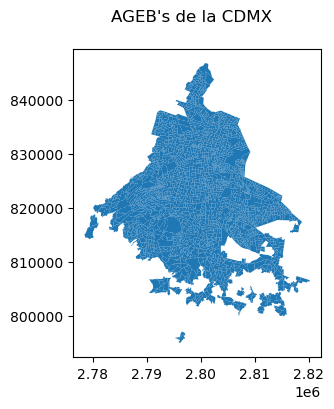

In [15]:
fig , ax = plt.subplots(1, figsize=(4,4))
agebs.plot(ax = ax)
fig.suptitle("AGEB's de la CDMX")
plt.show()

### Propiedades del dibujo

Hasta aquí hemos modificado algunas propiedades generales de la figura y los ejes. También queremos tener una forma de modoficar propiedades del dibujo como el estilo de las líneas y de los polígonos.

Cambiar estas propiedades se hace desde el método `plot()`y, aunque tienen unos nombres medio extraños, es muy fácil cambiarlos.

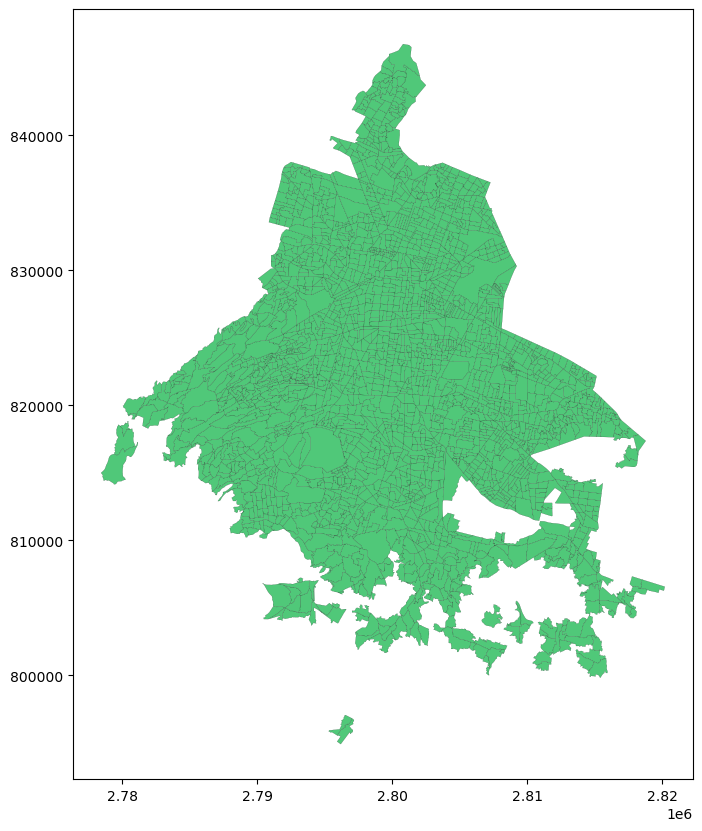

In [16]:
fig , ax = plt.subplots(1, figsize=(10,10))
# En la siguiente línea se modifica el color de los polígonos ('facecolor'), del borde ('edgecolor') y su ancho ('linewidth')
agebs.plot(linewidth = 0.1, facecolor = '#50C879', edgecolor='#000702',ax = ax)
plt.show()

Simplemente modoficamos los valores de los parámetros `linewidth`, `facecolor` y `edgecolor` que modifican el ancho de la línea, el color del polígono y el color del borde respectivamente.

De la misma forma podemos cambiar los colores y ancho de una capa de líneas.

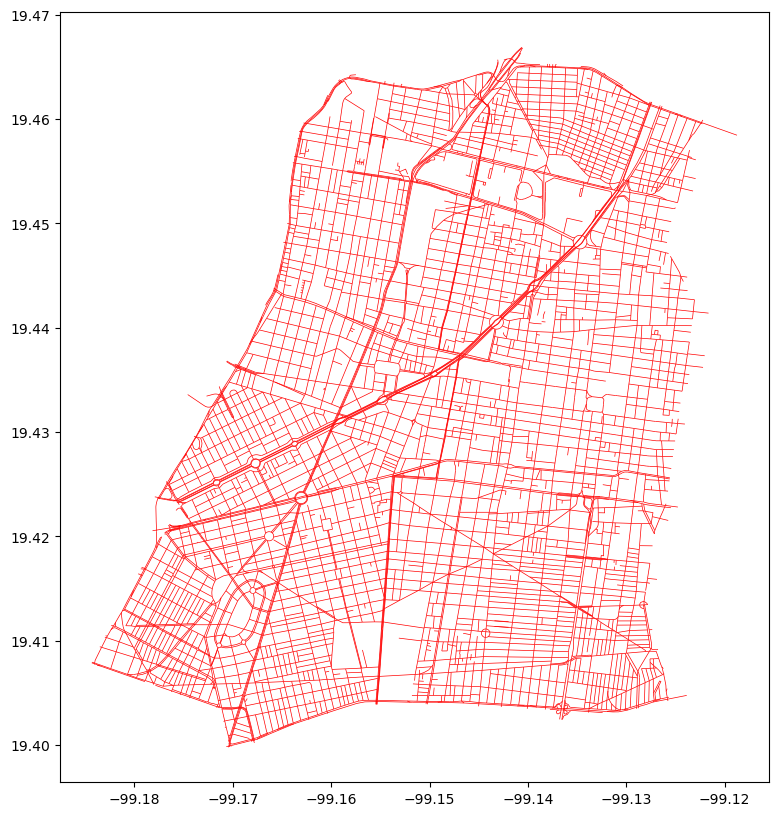

In [17]:
fig , ax = plt.subplots(1, figsize=(10,10))
vias.plot(linewidth = 0.5, color = 'red',ax = ax)
plt.show()

Ahora para cambiar el color usamos la propiedad `color`, las líneas no tienen `facecolor`.

## Sistemas de coordenadas

Una de las características distintivas de los datos geográficos es el Sistema de Referencia espacial (CRS, en inglés). El CRS nos dice cómo están _referidos_ los datos a la superficie de la tierra.

Geopandas provee métodos para trabajar con sistemas de referencia. Primero, si la fuente de donde leímos los datos, tiene una referencia, esta se va a conservar a través de la propiedad `crs`:

In [18]:
agebs.crs

<Derived Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["ITRF2008",DA ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich


Para reproyectar nuestros datos a un sistema diferente se requiere conocer el código SRID del nuevo sistema. En el sitio [Spatial Reference](https://spatialreference.org/) podemos buscar los códigos de diferentes proyecciones y sistemas de referencia.

Por ejemplo, para cambiar la proyección de nuestros datos al sistema UTM, hacemos:

<AxesSubplot: >

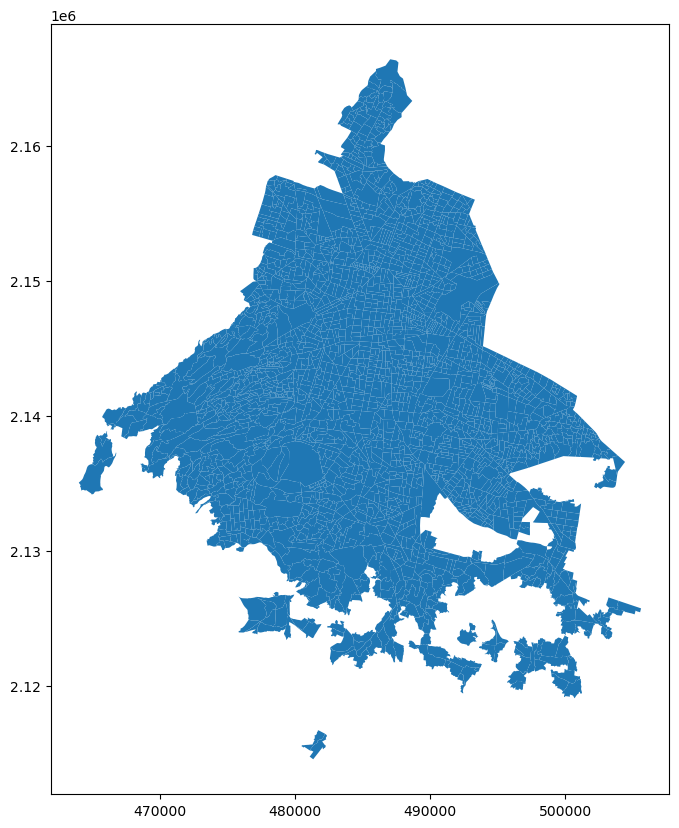

In [19]:
agebs.to_crs(32614).plot(figsize = (10,10))

Debido a que el área de trabajo es relativamente pequeña, la forma de los polígonos observados es casi idéntica a la observada en los ejemplos anteriores. Sin embargo, la escala utilizada para la gráfica es ahora diferente.
___
### Para practicar

Genera un mapa de las AGEB's de la Ciudad de México que posea las siguientes características:
* Posea un título
* No muestre los ejes
* Posea un tamaño de 10in x 11in
* Todos los polígonos tengan un relleno del color "#525252" y sean completamente opacos
* Los bordes del polígono tengan un ancho de 0.3 y sean del color "#B9EBE3"
___

## Múltiples Capas

Por lo pronto nuestros mapas se han limitado a una sola capa, sin embargo es bastante común querer sobreponer _visualmente_ diferentes capas de información. Hacer esto con Geopandas es muy sencillo, simplemente necesitamos agragar los nuevos dibujos a los _ejes_ ya existentes. Por ejemplo, podemos combinar en un sólo mapa las vialidades de la alcaldía Cuahutemoc con sus límites.

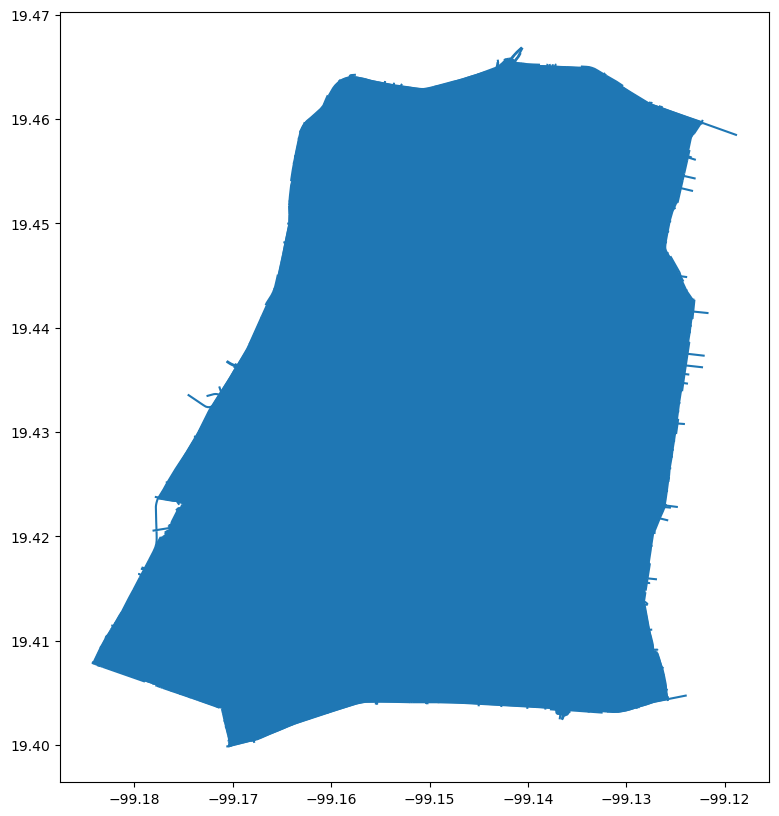

In [20]:
# Primero se necesita importar el polígono de la alcaldía, pues no se ha utilizado en ejemplos anteriores
cuauhtemoc = gpd.read_file("datos/cuauhtemoc.geojson")
# Se establece la figura y su eje con '.subplots()'
fig , ax = plt.subplots(1, figsize = (10,10))
# Se añade primero el polígono base en la fila
cuauhtemoc.plot(ax = ax)
# Y después se colocan las vialidades en la misma fila
vias.plot(ax = ax)
# Por último, y como se ha hecho en ejemplos anteriores, el comando para mostrar el resultado
plt.show()

Se alcanza a ver que ahí debajo del polígono están las líneas, pero claramente necesitamos trabajar más el mapa. Cambiemos los colores y la transparencia.

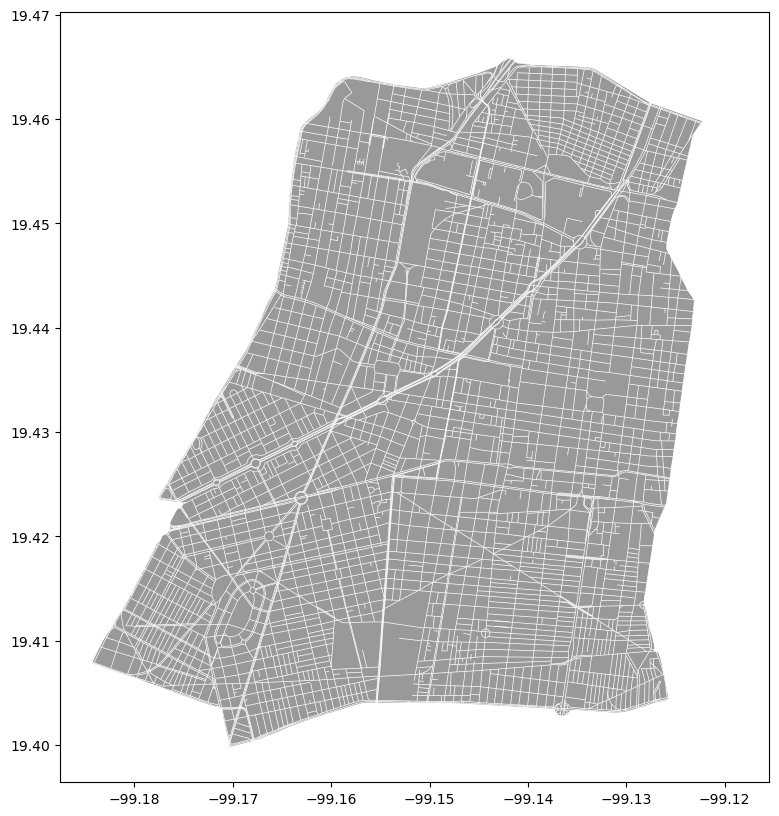

In [21]:
fig , ax = plt.subplots(1, figsize = (10,10))
# Para el polígono, se utilizan los argumentos aplicables al polígono
cuauhtemoc.plot(ax = ax, facecolor = 'grey', alpha = 0.8)
# Y pra las líneas, se utilizan los argumentos usados para las líneas
vias.plot(ax = ax, color = 'white', linewidth = 0.5)
plt.show()

___
## Paletas de Colores

La elección de colores en un mapa está muy relacionada con la efectividad para comunicar. Aunque en algunos casos elegir estos colores a mano sea suficiente, a veces es conveniente recurrir a paletas ya previamente diseñadas (por ejemplo, para dseñar mapas accesibles a personas daltónicas).

En este caso vamos a usar la librería [`palettable`](https://jiffyclub.github.io/palettable/) que nos provee con diferentes paletas de colores.


Llamemos entonces a una paleta de colores y guardemosla en una variable.

In [22]:
paleta = pltt.wesanderson.Darjeeling2_5.hex_colors

Para visualizar la apariencia de esta paleta, se recurre a la función `palplot()` de `seaborn`:

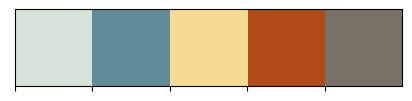

In [23]:
palplot(paleta)

Si se ve la variable por sí misma, podrá notarse que no se trata más que de una lista de colores bajo su Código Hexadecimal:

In [24]:
paleta

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

Esta paleta será la que le dará color a nuestro mapa. Como elemento adicional, se colocarán las colonias en las que se subdivide la alcaldía y en donde se han registrado 10 o más homicidios entre los años 2016 a 2018, por lo que primero es necesario importarlas:

In [25]:
agebs_cuau = gpd.read_file("datos/agebs_cuauhtemoc.geojson")

Para esto, no se utilizará nada más que lo aprendido en secciones anteriores de la práctica, siendo la única diferencia que dentro de los argumentos de color correspondientes se colocará el Código Hexadecimal del color que se pretenda utilizar para esa capa:

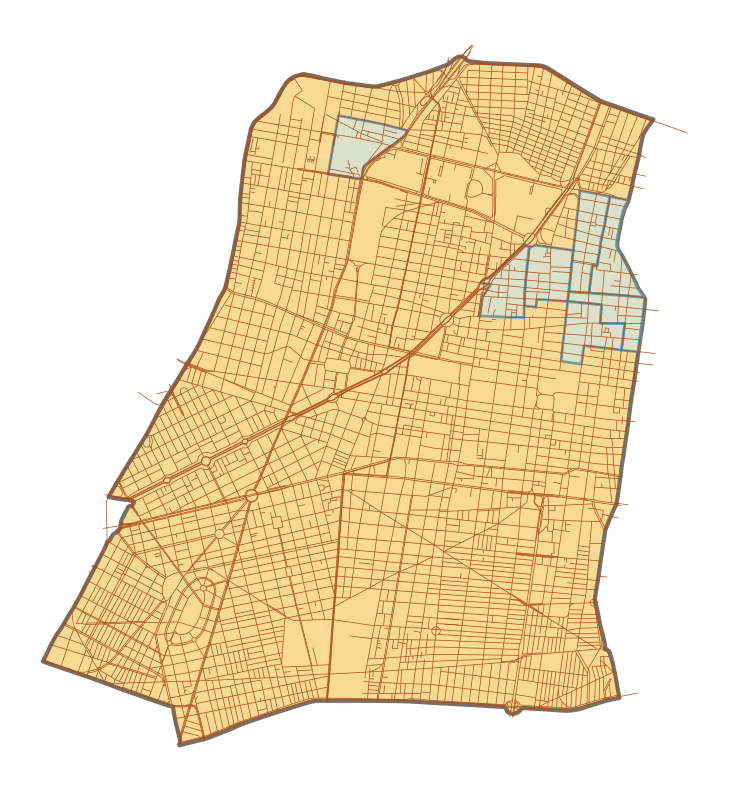

In [26]:
# Se define la figura con sus respectivas filas
fig , ax = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = ax, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = ax, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = ax, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
ax.set_axis_off()
plt.show()

___
## Exportar Mapas
Una vez producido el mapa final, puede que se busque el exportar la imagen de modo que pueda ser colocada en un reporte, artículo, sitio web, etc. Para exportar mapas en Python, basta con sustituir la función `plt.show()` por `plt.savefig()` al final de las líneas de código para especificar el dónde y cómo guardarla. Por ejemplo, para guardar el mapa anterior en un archivo de tipo `.png` en la carpeta `data`, donde se encuentra toda la información con la que se ha trabajado hasta ahora, simplemente basta con:

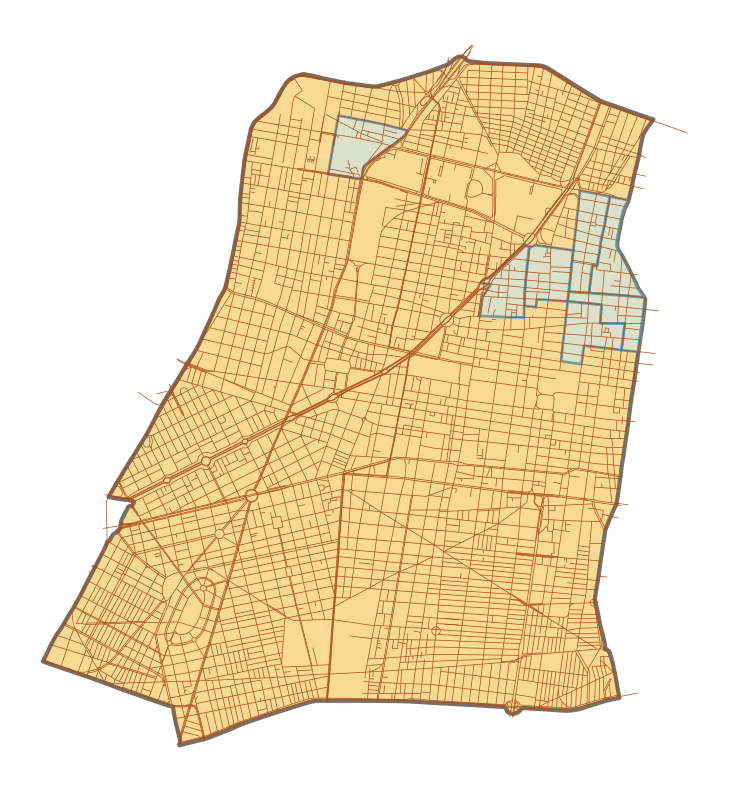

In [28]:
# Se define la figura con sus respectivas filas
fig , ax = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = ax, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = ax, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = ax, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
ax.set_axis_off()

# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('datos/mapa_final.png')

Si se revisa la carpeta, se encontrará la imagen `.png` con el mapa.

La función `plt.savefig()`, de la librería `matplotlib.pyplot` contiene un gran número de parámetros y opciones para trabajar. Dado que el tamaño del mapa generado no es muy grande, es posible incrementar la calidad de éste a través del argumento `dpi`, o *Puntos Por Pulgada* (dpi), el cual es una medida estándar de la resolución de las imágenes. Por ejemplo, para obtener una imagen de Alta Definición (HD), se puede cambiar el argumento a 1,080:

**Importante** - Si el proceso tarda demasiado, cambiar el argumento por 500 también funciona, pues también arrojará una imagen de buena calidad y más fácil de generar.

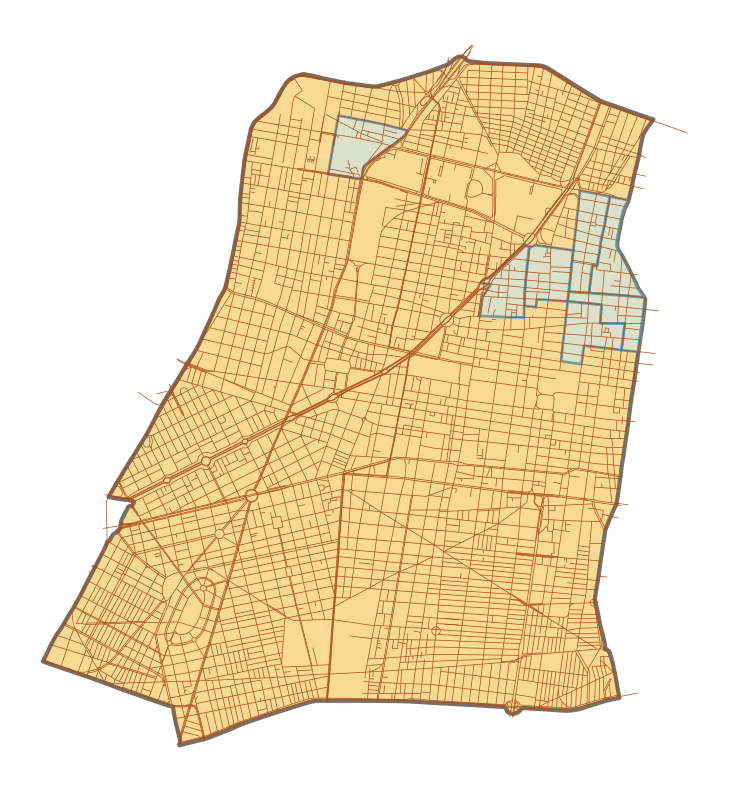

In [30]:
# Se define la figura con sus respectivas filas
fig , ax = plt.subplots(1, figsize = (10,10))
# Se añade el polígono base de la alcaldía
cuauhtemoc.plot(ax = ax, facecolor = '#F9DA95', edgecolor= '#787064', linewidth = 3)
# Se añaden las vías
vias.plot(ax = ax, color = '#AE4B16', linewidth = 0.5)
# Se aladen las AGEB's con el mayor número de homicidios
agebs_cuau.plot(ax = ax, facecolor = '#D5E3D8', edgecolor = '#618A98', linewidth = 2, alpha = 0.8)
# Se remueve el marco con los ejes de la fila
ax.set_axis_off()

# Se guarda el mapa como un archivo PNG en la carpeta 'data/'
plt.savefig('datos/mapa_final.png', dpi = 1080)